Собрать все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

In [77]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = "C:\\Users\\majkl\\WorkSpace\\Project3\\data\\"
df_list = []

for date in os.listdir(path):
    for name in os.listdir(path + date):
        if name.startswith('.'):
            continue
        file_path = f'{path}{date}/{name}/data.csv'
        t_df = pd.read_csv(file_path, sep = ',', index_col = 0)
        t_df['name'], t_df['date'] = name, date
        df_list.append(t_df)
df = pd.concat(df_list).reset_index().drop('index', axis=1)
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [ ]:
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


Выяснить, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [76]:
sum_quantity = df.groupby('name').quantity.sum()
max = sum_quantity.max()
user = sum_quantity.loc[sum_quantity == max].index.sort_values()
user

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

Найти топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [91]:
product = df.groupby('product_id', as_index=False).quantity.sum()
top10 = product.sort_values('quantity', ascending=False)[:10]
top10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


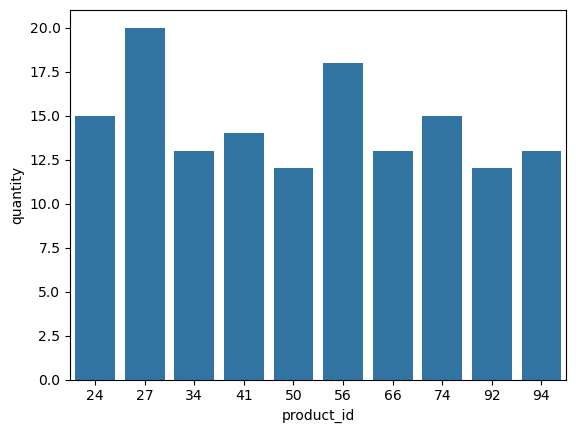

In [ ]:
sns.barplot(x = 'product_id',
            y = 'quantity',
            data = top10.sort_values('quantity', ascending=False))
plt.show()


Ответ 18

Визуализировать продажи по дням.

In [ ]:
quantity_date = df.groupby('date', as_index=False).quantity.sum()
quantity_date

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


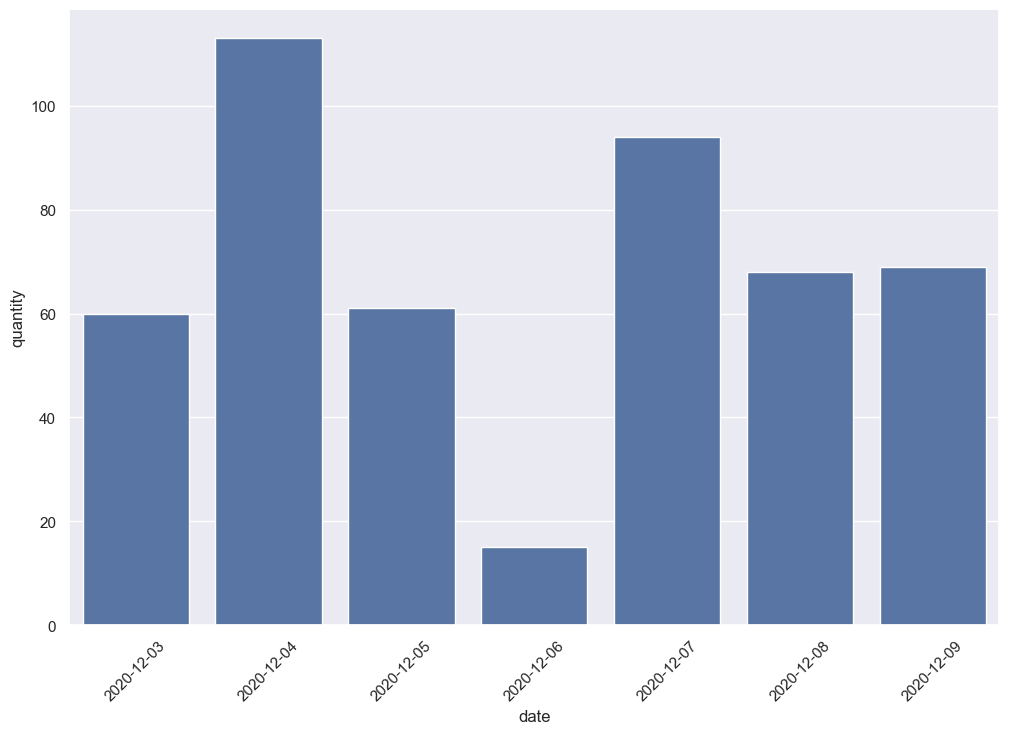

In [110]:
sns.barplot(x = 'date',
            y = 'quantity',
            data = quantity_date)
plt.xticks(rotation=45)
#sns.set_theme(rc={'figure.figsize':(12,8)})
plt.show()

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?

In [111]:
same_product = df.groupby(['name', 'product_id']).date.nunique().sort_values(ascending=False)
same_product

name            product_id
Anton_Ivanov    15            2
Petr_Fedorov    94            2
Alexey_Fedorov  13            1
Petr_Smirnov    21            1
Petr_Petrov     64            1
                             ..
Anton_Smirnov   28            1
                33            1
                34            1
                40            1
Vasiliy_Petrov  78            1
Name: date, Length: 158, dtype: int64

In [112]:
same_product.loc[same_product > 1]

name          product_id
Anton_Ivanov  15            2
Petr_Fedorov  94            2
Name: date, dtype: int64

Ответ 2